# Setting

In [33]:
outdir = './output_Al'
csvType='Keysight'

import os

# Import libraries

In [34]:
import os
import sys
sys.path.append(os.path.join(os.path.dirname('.'), '..'))
from utils import *

# Define function to read data & make plots

In [36]:
def read_and_plot(
    filename_list, label_list, suffix_list, color_list, suffix_all, outdir, 
    markersize=1.0, linestyle='', linewidth=0,
    xmin=None, xmax=None, ymin=None, ymax=None,
    figsize = (12, 2.5),
    ):
    # Check output directory
    if not os.path.isdir(outdir):
        print(f'Create a new directory for output files! --> {outdir}')
        os.mkdir(outdir)
        pass
    
    freq_list = []
    power_list = []
    for filename in filename_list:
        freq, power = read_csv(f'{filename}', csvType=csvType)
        freq_list.append(np.array(freq))
        power_list.append(np.array(power))
        pass
    
    # Select data between freq_min and freq_max
    for i, freq in enumerate(freq_list):
        power_list[i] = power_list[i][ (freq >= freq_min) & (freq <= freq_max) ]
        freq_list[i] = freq_list[i][ (freq >= freq_min) & (freq <= freq_max) ]
        pass
    
    # Plot each data
    for freq, power, label, suffix, color in zip(freq_list, power_list, label_list, suffix_list, color_list):
        '''
        plot_power(
            False, [freq], [power], [label], [color], f'{suffix}{suffix_all}', outdir,
            markersize=markersize, linestyle=linestyle, linewidth=linewidth, figsize=figsize,
            xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax)
        plot_power(
            False, [freq], [power], [label], [color], f'{suffix}{suffix_all}_logy', outdir, logy=True,
            markersize=markersize, linestyle=linestyle, linewidth=linewidth, figsize=figsize,
            xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax)
        '''
        plot_power(
            True, [freq], [power], [label], [color], f'{suffix}{suffix_all}', outdir,
            markersize=markersize, linestyle=linestyle, linewidth=linewidth, figsize=figsize,
            xmin=xmin, xmax=xmax, ymin=to_dB(ymin), ymax=to_dB(ymax))
        pass
    
    # Plot all datas
    suffix = '-'.join(suffix_list)
    if len(suffix)>50: suffix = suffix[:50]
    suffix += suffix_all
    '''
    plot_power(
        False, freq_list, power_list, label_list, color_list, suffix, outdir,
        markersize=markersize, linestyle=linestyle, linewidth=linewidth, figsize=figsize,
        xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax)
    plot_power(
        False, freq_list, power_list, label_list, color_list, f'{suffix}_logy', outdir, logy=True,
        markersize=markersize, linestyle=linestyle, linewidth=linewidth, figsize=figsize,
        xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax)
    '''
    plot_power(
        True, freq_list, power_list, label_list, color_list, f'{suffix}_logy', outdir,
        markersize=markersize, linestyle=linestyle, linewidth=linewidth, figsize=figsize,
        xmin=xmin, xmax=xmax, ymin=to_dB(ymin), ymax=to_dB(ymax))
          
    return
  

# Plot all the frequency range

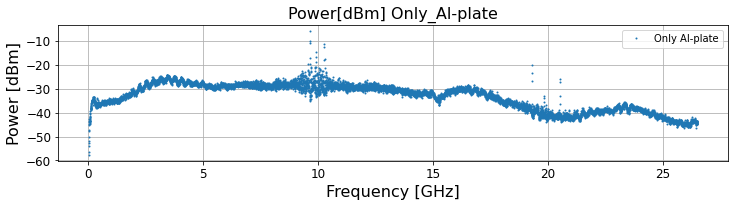

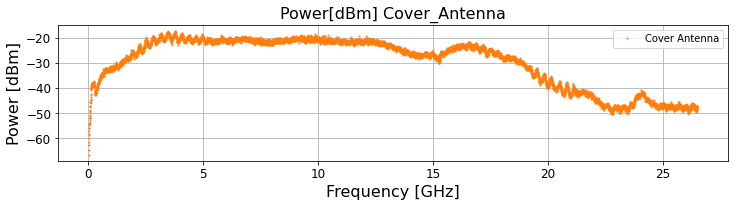

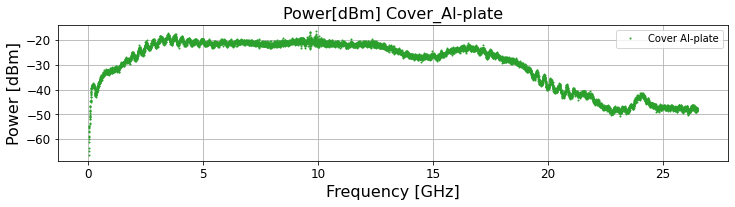

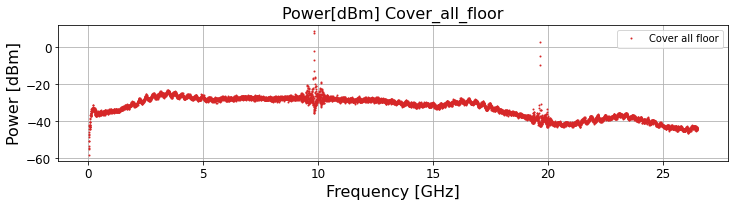

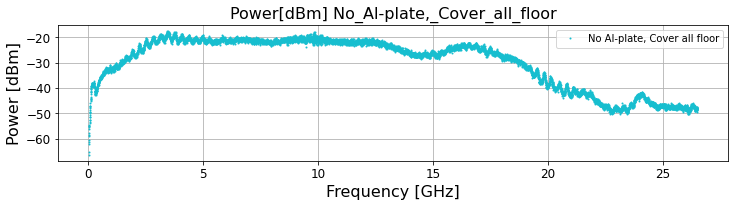

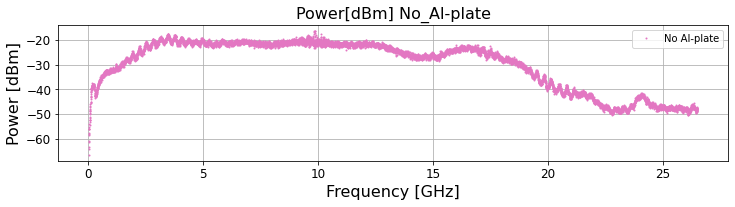

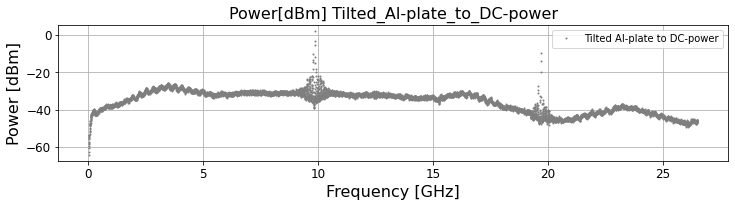

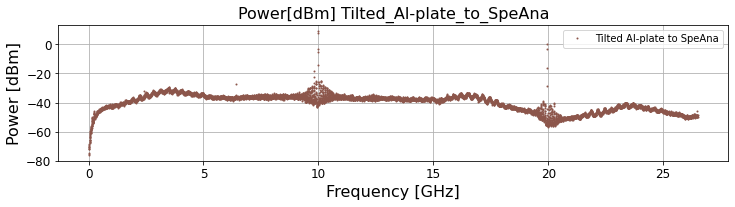

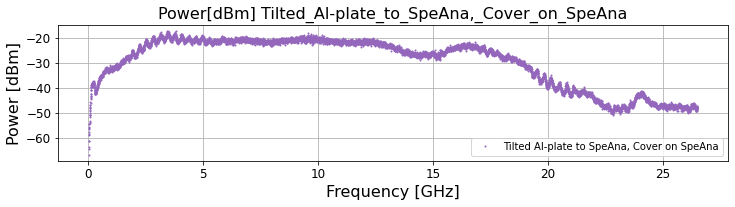

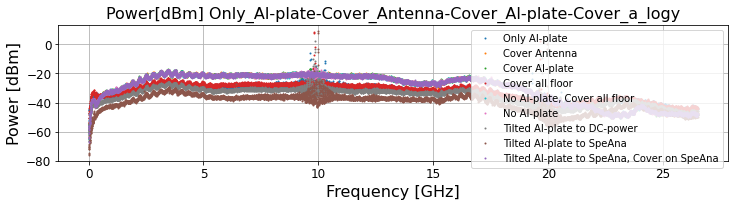

In [37]:
datadir_new = './../../../data/dosue-j_20220304/'
datadir_base = './../../../data/dosue-j_reference_20220303/'
_outdir = outdir
data_list =  [
    [f'{datadir_new}/220304_002_al_1.csv',                                              'Only Al-plate'],
    [f'{datadir_new}/220304_002_al_wt_300K_1.csv',                                      'Cover Antenna'],
    [f'{datadir_new}/220304_002_alcoveredbyECO_allcover_1.csv',                         'Cover Al-plate'],
    [f'{datadir_new}/220304_002_al_allcover_floorcover_powercover_nophone_1.csv',       'Cover all floor'],
    [f'{datadir_new}/220304_002_noal_allcover_floorcover_nophone_1.csv',                'No Al-plate, Cover all floor'],
    [f'{datadir_new}/220304_002_noal_nophone_1.csv',                                    'No Al-plate'],
    [f'{datadir_new}/220304_002_altilt_angle1_nophone_1.csv',                           'Tilted Al-plate to DC-power'],
    [f'{datadir_new}/220304_002_altilt_angle2toSpe_nophone_1.csv',                      'Tilted Al-plate to SpeAna'],
    [f'{datadir_new}/220304_002_altilt_angle2toSpe_wtECOonSpe_nophone_1.csv',           'Tilted Al-plate to SpeAna, Cover on SpeAna'],
]
file_list = [ data[0] for data in data_list ]
label_list = [ data[1] for data in data_list ]
suffix_list = [ label.replace(' ','_') for label in label_list ]
freq_min = 0. # initial cut on freq
freq_max = 26.5 # initial cut on freq
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:cyan', 'tab:pink', 'tab:gray', 'tab:brown', 'tab:purple', 'tab:olive'] * 10

read_and_plot(
    file_list, label_list, suffix_list, colors, 
    suffix_all='', outdir=_outdir)

Create a new directory for output files! --> ./output_Al_wtSpeECO


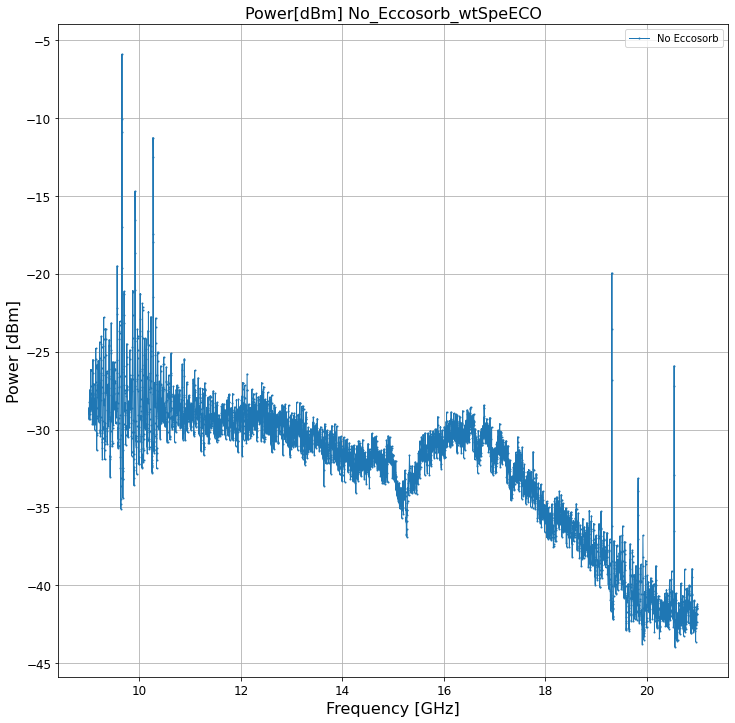

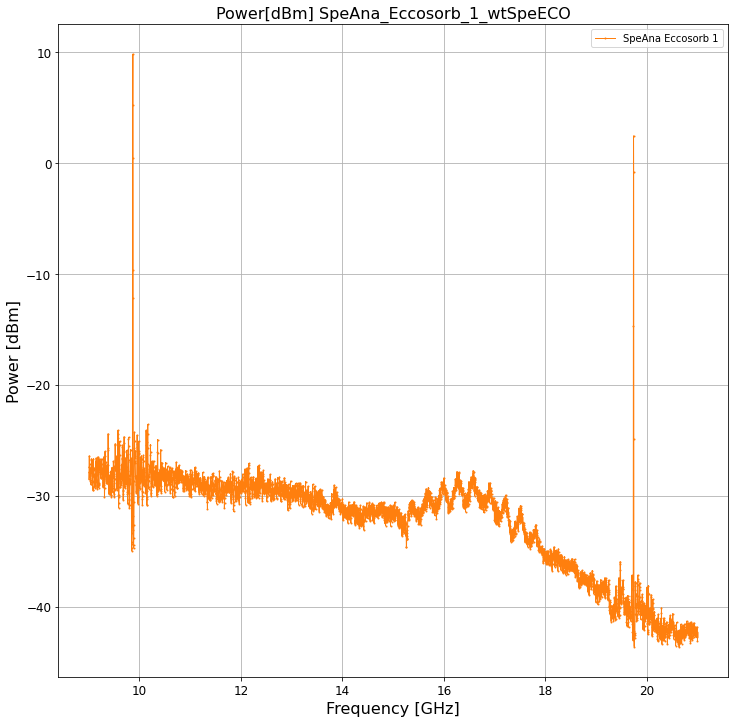

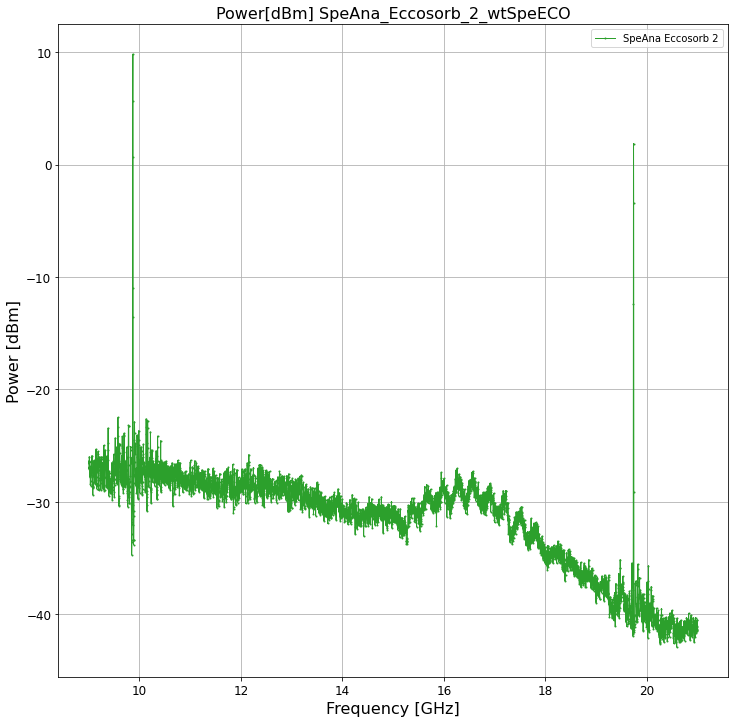

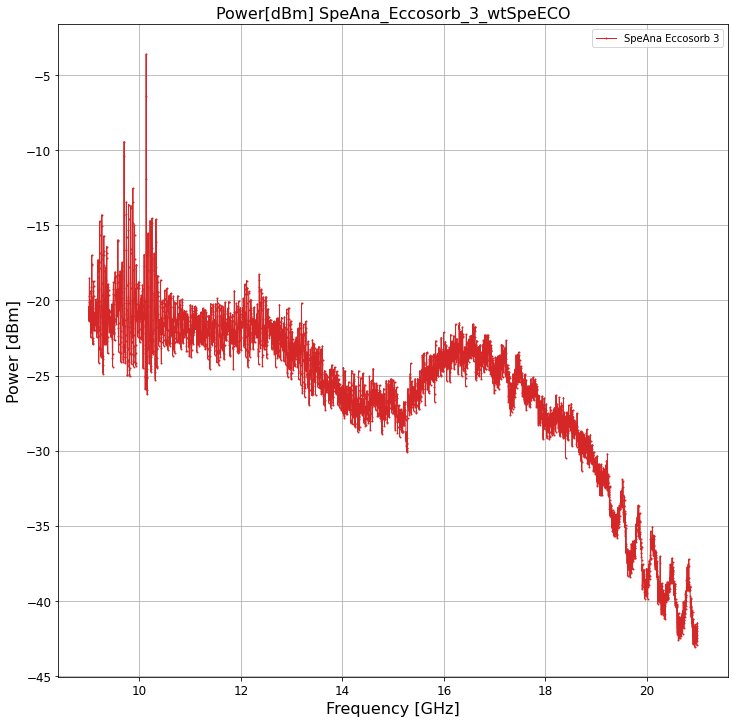

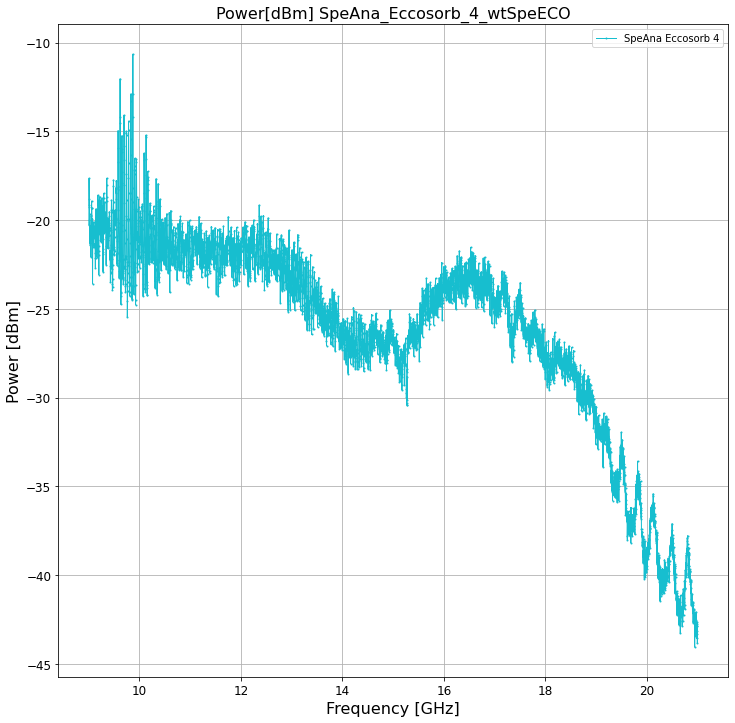

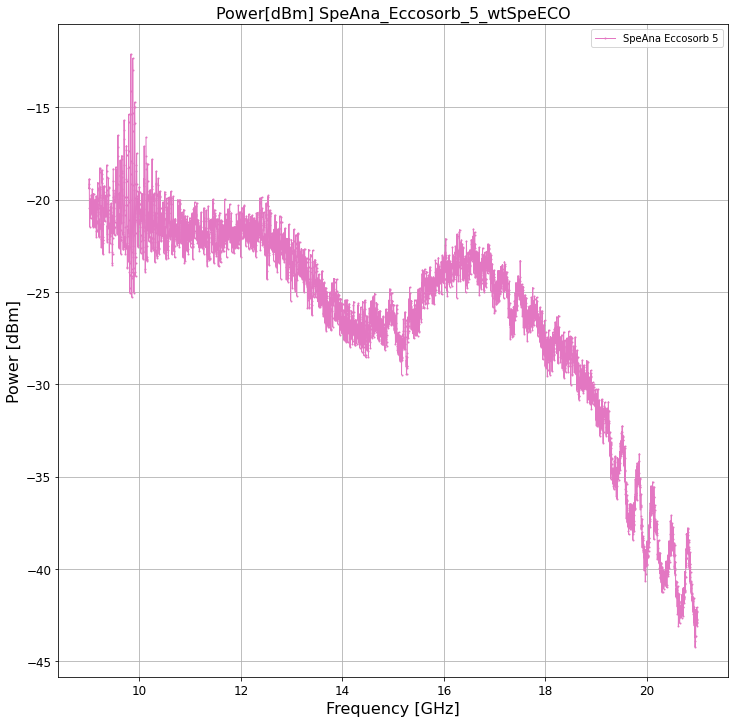

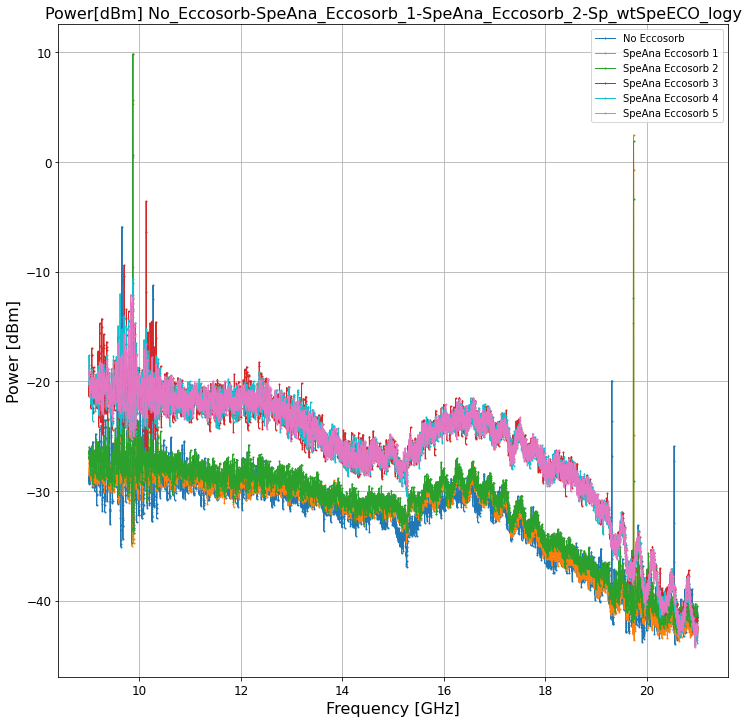

In [45]:
datadir_new = './../../../data/dosue-j_20220304/'
datadir_base = './../../../data/dosue-j_reference_20220303/'
suffix_all = '_wtSpeECO'
_outdir = outdir+suffix_all
data_list =  [
    [f'{datadir_new}/220304_002_al_1.csv',          'No Eccosorb'],
    [f'{datadir_new}/220304_002_al_wtSpeECO_1.csv', 'SpeAna Eccosorb 1'],
    [f'{datadir_new}/220304_002_al_wtSpeECO2_1.csv', 'SpeAna Eccosorb 2'],
    [f'{datadir_new}/220304_002_al_wtSpeECO3_1.csv', 'SpeAna Eccosorb 3'],
    [f'{datadir_new}/220304_002_al_wtSpeECO4_1.csv', 'SpeAna Eccosorb 4'],
    [f'{datadir_new}/220304_002_al_wtSpeECO5_1.csv', 'SpeAna Eccosorb 5'],
]
file_list = [ data[0] for data in data_list ]
label_list = [ data[1] for data in data_list ]
suffix_list = [ label.replace(' ','_') for label in label_list ]
freq_min = 9. # initial cut on freq
freq_max = 21. # initial cut on freq
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:cyan', 'tab:pink', 'tab:gray', 'tab:brown', 'tab:purple', 'tab:olive'] * 10

read_and_plot(
    file_list, label_list, suffix_list, colors, 
    suffix_all=suffix_all, outdir=_outdir,
    figsize = (12,12), linestyle='-', linewidth=1,
)

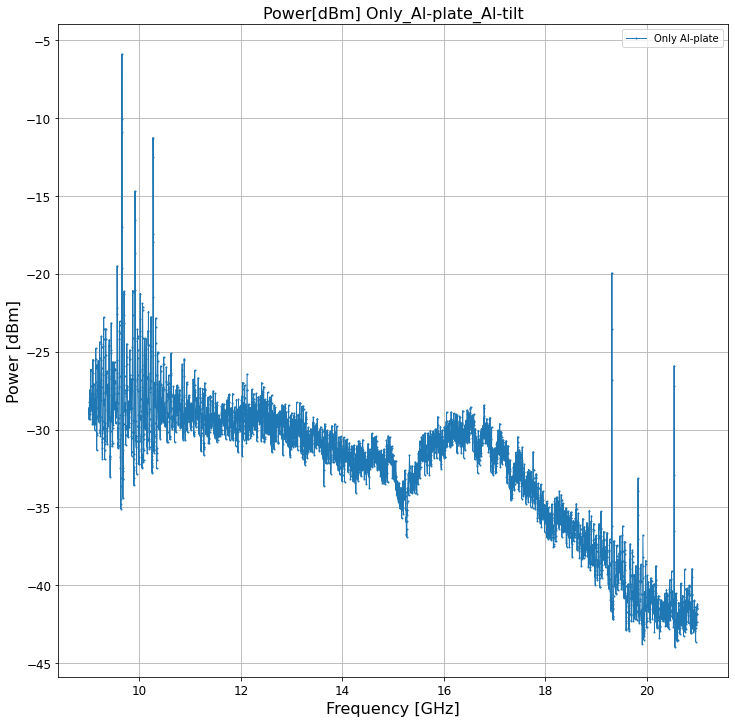

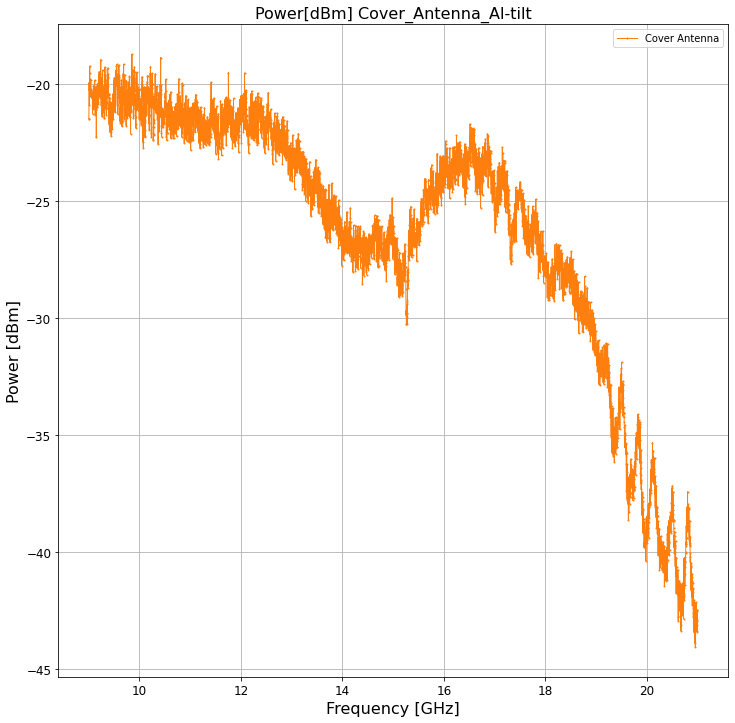

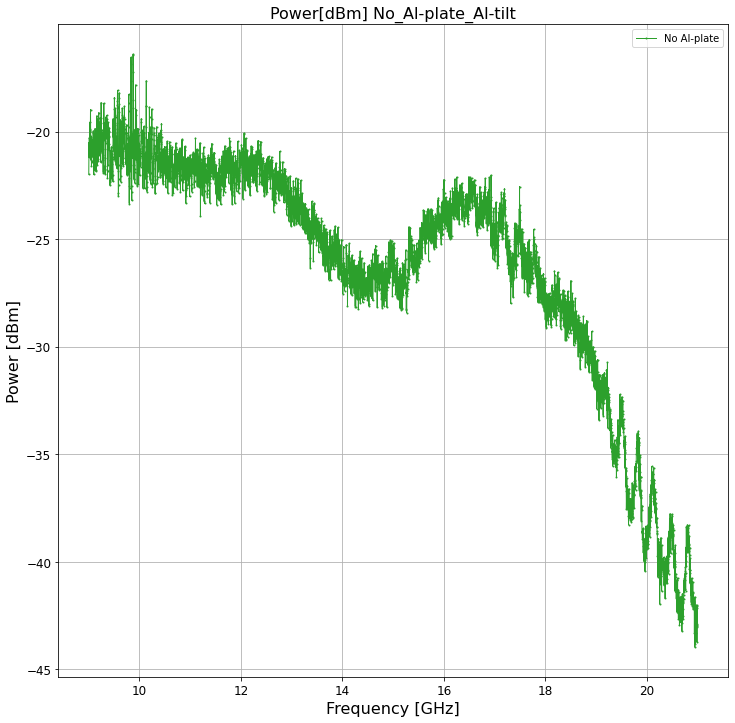

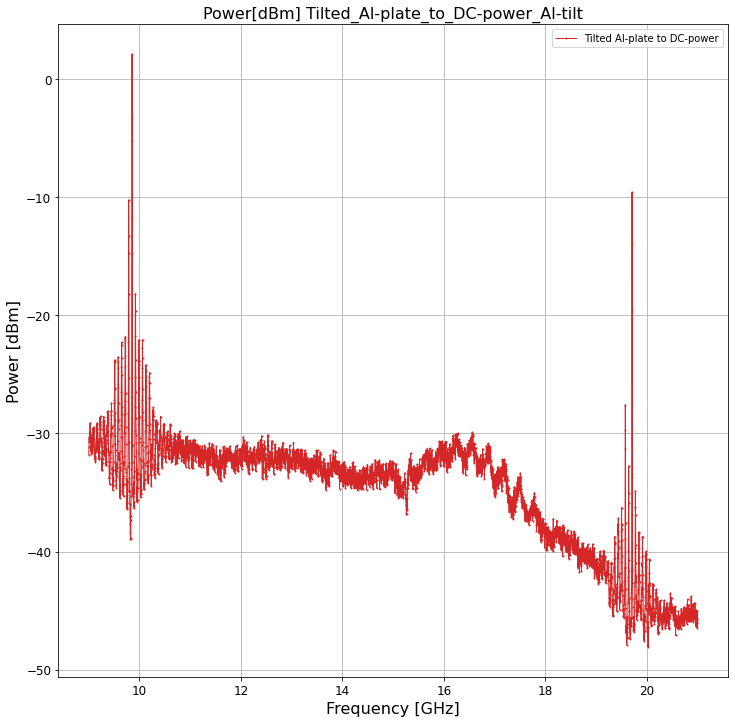

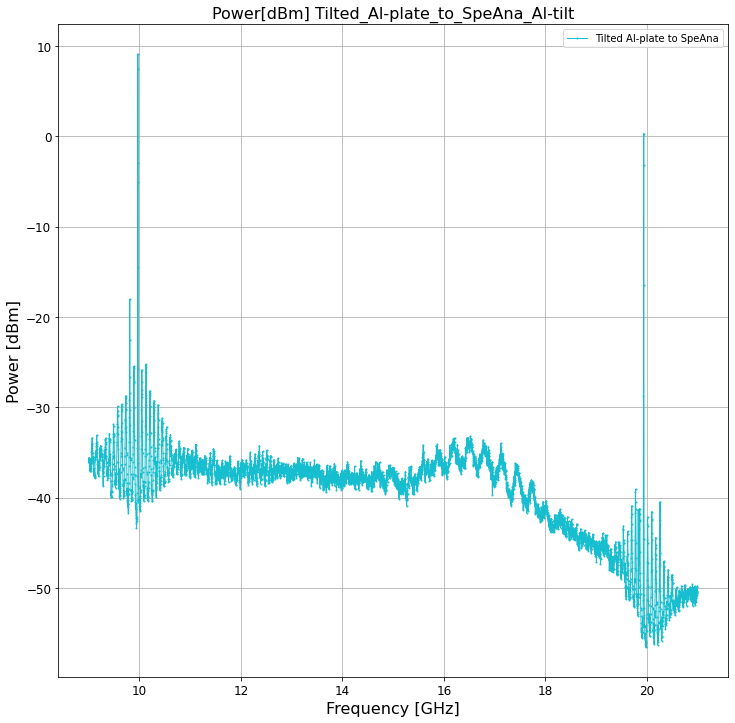

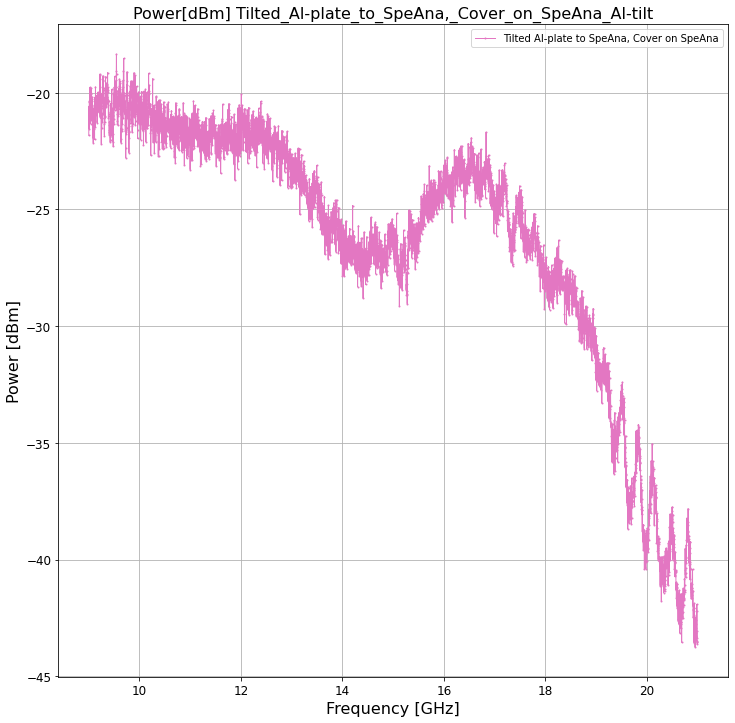

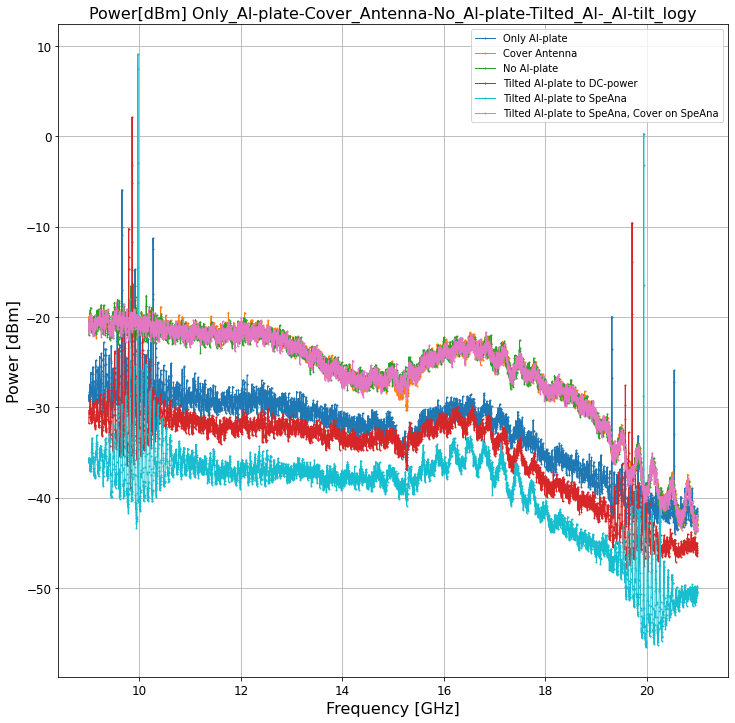

In [43]:
datadir_new = './../../../data/dosue-j_20220304/'
datadir_base = './../../../data/dosue-j_reference_20220303/'
suffix_all = '_Al-tilt'
_outdir = outdir+suffix_all
data_list =  [
    [f'{datadir_new}/220304_002_al_1.csv',                                              'Only Al-plate'],
    [f'{datadir_new}/220304_002_al_wt_300K_1.csv',                                      'Cover Antenna'],
    [f'{datadir_new}/220304_002_noal_nophone_1.csv',                                    'No Al-plate'],
    [f'{datadir_new}/220304_002_altilt_angle1_nophone_1.csv',                           'Tilted Al-plate to DC-power'],
    [f'{datadir_new}/220304_002_altilt_angle2toSpe_nophone_1.csv',                      'Tilted Al-plate to SpeAna'],
    [f'{datadir_new}/220304_002_altilt_angle2toSpe_wtECOonSpe_nophone_1.csv',           'Tilted Al-plate to SpeAna, Cover on SpeAna'],
]
file_list = [ data[0] for data in data_list ]
label_list = [ data[1] for data in data_list ]
suffix_list = [ label.replace(' ','_') for label in label_list ]
freq_min = 9. # initial cut on freq
freq_max = 21 # initial cut on freq
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:cyan', 'tab:pink', 'tab:gray', 'tab:brown', 'tab:purple', 'tab:olive'] * 10

read_and_plot(
    file_list, label_list, suffix_list, colors, 
    figsize = (12,12), linestyle='-', linewidth=1,
    suffix_all=suffix_all, outdir=_outdir)